This is me messing around with a SpaCy Ner bit of code Tom shared w/ me, as a part of our first round of data analysis.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
#from datasets import load_dataset
import spacy
import json
from datetime import datetime
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import os
import seaborn as sns


In [2]:
os.chdir('c:\\Users\\willo\\Desktop\\test repo\\final-project-repo-team-7')
from scripts.clean_data import clean_text

Exploring + Formatting dataset

In [3]:

df = pd.read_csv('data/all_speeches.csv', index_col= 'Unnamed: 0')
df.head()

,title,doc_name,url,date,transcript,transcript_html,president,introduction,video,audio
0,"July 2, 1807: Proclamation in Response to the ...",/the-presidency/presidential-speeches/july-2-1...,https://millercenter.org/the-presidency/presid...,1807-07-02T13:03:58-04:56,During the wars which for some time have unhap...,<p>During the wars which for some time have un...,Thomas Jefferson,"Restating the American policy of neutrality, J...",NaN,NaN
1,"December 3, 1900: Fourth Annual Message",/the-presidency/presidential-speeches/december...,https://millercenter.org/the-presidency/presid...,1900-12-03T13:00:00-05:00,To the Senate and House of Representatives: \n...,<p>To the Senate and House of Representatives:...,William McKinley,NaN,NaN,NaN
2,"December 2, 1806: Sixth Annual Message",/the-presidency/presidential-speeches/december...,https://millercenter.org/the-presidency/presid...,1806-12-02T13:03:58-04:56,TO THE SENATE AND HOUSE OF REPRESENTATIVES OF ...,<p>TO THE SENATE AND HOUSE OF REPRESENTATIVES ...,Thomas Jefferson,Jefferson addresses the crisis with Spain at l...,NaN,NaN
3,"January 5, 1838: Proclamation",/the-presidency/presidential-speeches/january-...,https://millercenter.org/the-presidency/presid...,1838-01-05T13:03:58-04:56,Whereas information having been received of a ...,<p>Whereas information having been received of...,Martin Van Buren,NaN,NaN,NaN
4,"December 17, 1895: Message Regarding Venezuela...",/the-presidency/presidential-speeches/december...,https://millercenter.org/the-presidency/presid...,1895-12-17T16:24:00-05:00,To the Congress:<br />\nIn my annual message a...,<p>To the Congress:<br />\nIn my annual messag...,Grover Cleveland,"<p>From December 1894 through June 1897, the U...",NaN,NaN


In [4]:
#Temporary because stuff just wasn't working lol
def clean_text(text):
    '''
    Cleans the text transcripts
    '''

    #Deals w/ empty transcripts
    if pd.isna(text):
        return ""
    
    #make lowercase
    text = text.lower()

    #remove <> statements
    text = re.sub(r"<[^>]*>", ' ', text)

    #remove white space, special characters
    text = text.strip()
    text = re.sub(r'[^a-zA-Z0-9 ]', ' ', text)

    #prevents double spaces
    text = text.replace('  ', ' ')

    #set and return
    cleaned = text  # placeholder
    
    return cleaned

In [5]:
print("Missing values in dataset:")
print(df.isnull().sum())

#Create new column w/ cleaned transcripts
df['clean_transcript'] = [clean_text(text) for text in df['transcript']]
df.head()


Missing values in dataset:
title                0
doc_name             0
url                  2
date                 0
transcript           0
transcript_html      0
president            0
introduction       291
video              677
audio              513
dtype: int64


,title,doc_name,url,date,transcript,transcript_html,president,introduction,video,audio,clean_transcript
0,"July 2, 1807: Proclamation in Response to the ...",/the-presidency/presidential-speeches/july-2-1...,https://millercenter.org/the-presidency/presid...,1807-07-02T13:03:58-04:56,During the wars which for some time have unhap...,<p>During the wars which for some time have un...,Thomas Jefferson,"Restating the American policy of neutrality, J...",NaN,NaN,during the wars which for some time have unhap...
1,"December 3, 1900: Fourth Annual Message",/the-presidency/presidential-speeches/december...,https://millercenter.org/the-presidency/presid...,1900-12-03T13:00:00-05:00,To the Senate and House of Representatives: \n...,<p>To the Senate and House of Representatives:...,William McKinley,NaN,NaN,NaN,to the senate and house of representatives at...
2,"December 2, 1806: Sixth Annual Message",/the-presidency/presidential-speeches/december...,https://millercenter.org/the-presidency/presid...,1806-12-02T13:03:58-04:56,TO THE SENATE AND HOUSE OF REPRESENTATIVES OF ...,<p>TO THE SENATE AND HOUSE OF REPRESENTATIVES ...,Thomas Jefferson,Jefferson addresses the crisis with Spain at l...,NaN,NaN,to the senate and house of representatives of ...
3,"January 5, 1838: Proclamation",/the-presidency/presidential-speeches/january-...,https://millercenter.org/the-presidency/presid...,1838-01-05T13:03:58-04:56,Whereas information having been received of a ...,<p>Whereas information having been received of...,Martin Van Buren,NaN,NaN,NaN,whereas information having been received of a ...
4,"December 17, 1895: Message Regarding Venezuela...",/the-presidency/presidential-speeches/december...,https://millercenter.org/the-presidency/presid...,1895-12-17T16:24:00-05:00,To the Congress:<br />\nIn my annual message a...,<p>To the Congress:<br />\nIn my annual messag...,Grover Cleveland,"<p>From December 1894 through June 1897, the U...",NaN,NaN,to the congress in my annual message addresse...


In [10]:
# now make a column of the tokenized values for each of these?
# whatever next spacy step is...

Actual SpaCy Stuff now

In [9]:
nlp = spacy.load("en_core_web_sm")

# Preprocessing with spaCy
def spacy_preprocess(text):
    doc = nlp(text)
    tokens = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha and not token.is_stop
    ]
    return ' '.join(tokens)
# Apply to sample (spaCy is slow)
lemmatokens = df['clean_transcript'].head(100).tolist()
processed = [spacy_preprocess(t) for t in lemmatokens]
processed[:2]

['war time unhappily prevail power europe united states america firm principle peace endeavor justice regular discharge national social duty friendly office situation admit maintain belligerent accustomed relation friendship hospitality commercial intercourse take question animate power permit entertain wish restoration general peace observe good faith neutrality assume believe instance departure duty justly impute nation free use harbor water mean refit refreshment succor sick suffering time equal principle extend amidst constant recurrence act insubordination law violence person trespass property citizen commit officer belligerent party receive truth abuse law hospitality exception habitual commander british armed vessel hover coast frequent harbor subject repeat representation government assurance give proper order restrain limit right respect friendly nation order assurance effect instance punishment past wrong take place length deed transcend hitherto see suffer bring public sensi

Alright now we've got essentially a list (processed) of the lemmatized/tokenized scripts (each item in processed) which contains a number of individual tokens.

From here, we can try and find the most commonly appearing NORPs

In [7]:
from collections import Counter

# download once
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

In [10]:
type(processed[0])

str

In [11]:
test_df = df.head(1)

In [13]:
# Extract NORP entities and compute sentiment only on the sentence that contains the NORP (period-based splitting)
rows = []
import re

# Choose input texts: use `test_df` if present (for sampling), otherwise full df
texts = None
if 'df' in globals():
    texts = df['transcript'].astype(str)
else:
    texts = df['transcript'].astype(str)

for text in texts:
    if not isinstance(text, str) or not text.strip():
        continue

    # Build spaCy doc to get entity character offsets
    doc = nlp(text)
    norp_ents = [ent for ent in doc.ents if ent.label_ == 'NORP']
    if not norp_ents:
        continue

    # Split text into sentences using nearest period/question/exclamation (keep punctuation)
    sent_texts = [s.strip() for s in re.split(r'(?<=[\.\?!])\s+', text) if s.strip()]
    # compute start/end character indices for each sentence by searching forward from last offset
    positions = []  # list of (sent_text, start_char, end_char)
    offset = 0
    for s in sent_texts:
        idx = text.find(s, offset)
        if idx == -1:
            # fallback: skip this sentence if not found (shouldn't happen)
            continue
        positions.append((s, idx, idx + len(s)))
        offset = idx + len(s)

    if not positions:
        continue

    # For each NORP entity, find the exact containing sentence and compute sentiment on that single sentence only
    for ent in norp_ents:
        ent_start = ent.start_char
        ent_end = ent.end_char
        ent_sent_idx = None
        for i, (s, start, end) in enumerate(positions):
            if ent_start >= start and ent_end <= end:
                ent_sent_idx = i
                break

        if ent_sent_idx is None:
            # fallback: try simple substring match to find a sentence containing the entity text
            ent_text = ent.text.strip()
            for i, (s, start, end) in enumerate(positions):
                if ent_text.lower() in s.lower():
                    ent_sent_idx = i
                    break

        if ent_sent_idx is None:
            # if still not found, skip this entity
            continue

        # Take only the sentence that contains the entity
        sent_text = positions[ent_sent_idx][0]
        # compute sentiment on this single sentence only
        score = sid.polarity_scores(sent_text)['compound']
        rows.append({'group': ent.text, 'sentiment': score, 'context': sent_text})

# Create DataFrame with localized sentiment per NORP mention (single-sentence context)
sent_df = pd.DataFrame(rows)

print(f"Extracted {len(sent_df)} NORP mentions with sentiment scored only on the containing sentence")
sent_df.head()
sent_df.to_csv('data/norp_sentiment_sentence_context.csv')


#WOOF It's done! Yes!!

Extracted 20157 NORP mentions with sentiment scored only on the containing sentence


In [16]:
# Avoid throwing errors here
sent_df['sentiment'] = pd.to_numeric(sent_df['sentiment'], errors='coerce')

group_stats = (
    sent_df
    .groupby('group')
    .agg(mean_sentiment=('sentiment', 'mean'),
         count=('sentiment', 'size'))
    .reset_index()
)

# Organize
group_stats['mean_sentiment'] = group_stats['mean_sentiment'].round(3)
group_stats = group_stats.sort_values('count', ascending=False).reset_index(drop=True)

#w/o combining s endings
group_stats = group_stats[group_stats['count'] >= 10]

In [18]:
# Normalize group names and combine plural/singular forms (e.g., americans -> american)
sent_df['group_norm'] = sent_df['group'].astype(str).str.strip().str.lower().str.rstrip(".'")

# Build set of observed normalized group values
groups_set = set(sent_df['group_norm'].dropna().unique())

# Utility function: attempt to map plurals to singular 'root' forms
def singular_form(g):
    if not isinstance(g, str):
        return g
    s = g.strip()
    # remove trailing apostrophe/possessive characters
    s = s.rstrip(".'")
    # if string ends with 's' and the root exists in the observed groups, use the root
    if s.endswith('s'):
        root = s[:-1]
        if root in groups_set:
            return root
        # heuristic: 'ies' -> 'y' (countries -> country)
        if s.endswith('ies'):
            root2 = s[:-3] + 'y'
            if root2 in groups_set:
                return root2
    # try lemmatization via spaCy if available and single-token
    try:
        doc = nlp(s)
        if len(doc) == 1:
            lemma = doc[0].lemma_.lower()
            if lemma in groups_set:
                return lemma
    except Exception:
        pass
    return s

# Build a mapping for the unique groups and apply it
unique_groups = sent_df['group_norm'].dropna().unique()
mapping = {g: singular_form(g) for g in unique_groups}

# Manual overrides for common cases (optional) - add as needed
manual_fixes = {'americans': 'american', 'muslims': 'muslim', 'iraqis': 'iraqi', 'africans': 'african'}
mapping.update({k: v for k, v in manual_fixes.items() if k in mapping})

# Create combined column
sent_df['group_combined'] = sent_df['group_norm'].map(mapping).fillna(sent_df['group_norm'])

# Example diagnostics - counts before/after for common cases
examples = ['american', 'americans', 'muslim', 'muslims', 'iraqi', 'iraqis']
print('Counts (before) for some examples:')
print(sent_df['group_norm'].value_counts().loc[[g for g in examples if g in sent_df['group_norm'].values]].to_dict())
print('Counts (after) for some examples:')
print(sent_df['group_combined'].value_counts().loc[[g for g in examples if g in sent_df['group_combined'].values]].to_dict())

# Aggregate: mean sentiment and count for the combined groups
group_stats_combined = (
    sent_df
    .groupby('group_combined')
    .agg(mean_sentiment=('sentiment', 'mean'),
         count=('sentiment', 'size'))
    .reset_index()
)
group_stats_combined = group_stats_combined.rename(columns={'group_combined': 'group'})
group_stats_combined['mean_sentiment'] = group_stats_combined['mean_sentiment'].round(3)
group_stats_combined = group_stats_combined.sort_values('count', ascending=False).reset_index(drop=True)

# Show the new grouped stats DataFrame
group_stats_combined = group_stats_combined[group_stats_combined['count'] >= 10]

Counts (before) for some examples:
{'american': 6231, 'americans': 2648, 'muslim': 50, 'muslims': 42, 'iraqi': 190, 'iraqis': 75}
Counts (after) for some examples:
{'american': 8879, 'muslim': 92, 'iraqi': 265}


Awesome. We now have a combined & non-combined DataFrame.

In [19]:
group_stats_combined.shape

(100, 3)

The below code cell was written by CoPilot, with specific instructions and edits by a human, of course. The goal was for CoPilot to make a wordcloud of the most common adjectives associated with Americans, and color-code them based on whether those words are positive or negative. Additionally, I had copilot group the american identity across ethnic groups (ex. white americans, asian americans, etc.) and plurality (americans vs american).

Total occurrences of group mentions parsed: 13841
Top adjectives (all): [('american', 8872), ('fellow', 658), ('young', 221), ('great', 213), ('new', 152), ('foreign', 124), ('african', 124), ('wealthy', 120), ('good', 106), ('south', 94), ('first', 93), ('latin', 80), ('asian', 78), ('sure', 77), ('high', 74), ('north', 71), ('black', 70), ('old', 70), ('single', 69), ('proud', 69)]


C:\Users\willo\AppData\Local\Temp\ipykernel_14032\2339334568.py:138: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('RdYlGn')  # red->yellow->green diverging map


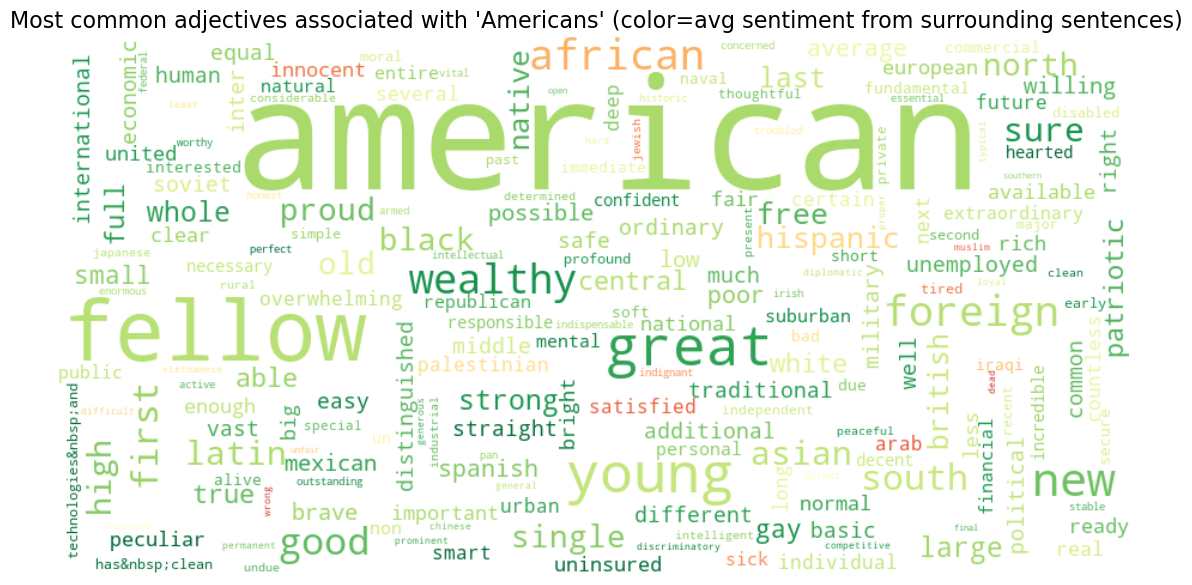


Top positive adjectives (avg sentiment):
smart 16 1.0
peculiar 17 0.997
uninsured 17 0.979
straight 28 0.967
easy 30 0.878
bright 20 0.861
gay 44 0.825
wealthy 120 0.819
sure 77 0.808
strong 57 0.798
international 28 0.795
well 24 0.787
united 21 0.767
whole 57 0.759
traditional 26 0.752

Top negative adjectives (avg sentiment):
arab 16 -0.67
satisfied 15 -0.646
innocent 19 -0.574
african 124 -0.387
hispanic 66 -0.222
palestinian 15 -0.21
average 38 0.09
countless 16 0.11
long 16 0.119
certain 15 0.12
several 16 0.128
old 70 0.138
white 54 0.154
real 22 0.195
soviet 28 0.204


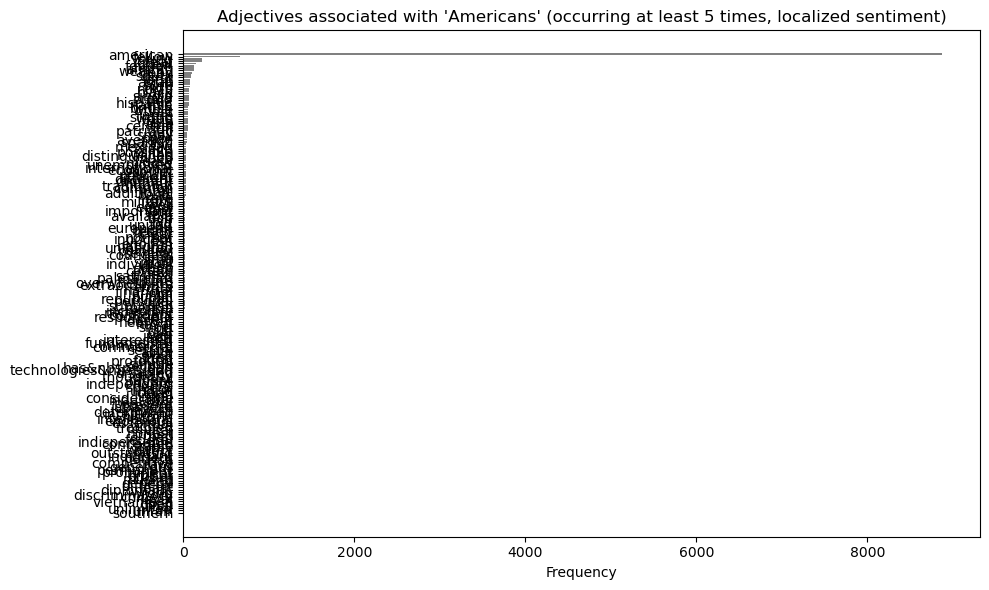

In [20]:
# Adjectives associated with 'americans' and wordcloud visualization (with subgroup normalization and localized sentiment coloring)
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import subprocess
import re

# Try importing/install wordcloud; if it's missing, install it programmatically
try:
    from wordcloud import WordCloud, STOPWORDS
except Exception:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'wordcloud'])
    from wordcloud import WordCloud, STOPWORDS

# Customize analysis:
target_root = 'american'  # root token to match
include_subgroups = True   # if True, include 'african american', 'white american' etc., otherwise only base 'american'
min_freq = 5  # min frequency to show in barplot
prefixes = {'african', 'black', 'native', 'white', 'asian', 'latin', 'hispanic'}  # prefixes indicating subgroup

def _left_non_punct_token(doc, idx):
    """Return the nearest left non-punctuation token, or None."""
    i = idx - 1
    while i >= 0:
        if not doc[i].is_punct:
            return doc[i]
        i -= 1
    return None

def is_group_mention(token):
    # token is spaCy token that contains 'american' in lemma or text (sing/plural).
    if 'american' not in token.lemma_.lower() and 'american' not in token.text.lower():
        return False
    if include_subgroups:
        return True
    # when not including subgroups, reject if a nonpunct left token is one of prefixes
    left = _left_non_punct_token(token.doc, token.i)
    if left and left.lemma_.lower() in prefixes:
        return False
    return True

# Collect adjectives across texts with per-occurrence sentiment scores (using localized context)
adjectives = []  # lemmas of adjectives
adjective_sentiments = defaultdict(list)  # map lemma -> list of context sentiments
occ_count = 0

# Process sent_df which already has localized sentiment from surrounding sentences
for idx, row in sent_df.iterrows():
    group_text = row['group']
    context_text = row.get('context', '')
    sentiment_score = row['sentiment']
    
    # Check if this group matches our target (american variants)
    if 'american' not in group_text.lower():
        continue
    
    # Check subgroup filtering
    group_lower = group_text.lower().strip()
    if not include_subgroups:
        # reject if it starts with a prefix (e.g., 'african american')
        for prefix in prefixes:
            if group_lower.startswith(prefix):
                continue
    
    if not context_text.strip():
        continue
    
    # Parse the context sentences
    doc = nlp(context_text)
    group_tokens = [t for t in doc if 'american' in t.lemma_.lower() or 'american' in t.text.lower()]
    
    if not group_tokens:
        continue
    
    # For each group token in the context, collect adjectives
    for gt in group_tokens:
        if not is_group_mention(gt):
            continue
        occ_count += 1
        
        # 1) adjectives as amod children of the group token (e.g., 'young Americans')
        for child in gt.children:
            if child.pos_ == 'ADJ' and child.dep_ in ('amod','acomp'):
                lemma = child.lemma_.lower()
                adjectives.append(lemma)
                adjective_sentiments[lemma].append(sentiment_score)
                # include conjuncts of that adjective (e.g., 'proud and determined')
                for sib in child.head.children:
                    if sib.dep_ == 'conj' and sib.pos_ == 'ADJ':
                        lemma2 = sib.lemma_.lower()
                        adjectives.append(lemma2)
                        adjective_sentiments[lemma2].append(sentiment_score)
        
        # 2) predicate adjectives (e.g., 'Americans are proud') -> ADJ with dep 'acomp' and verb head whose subject is the group
        for token in doc:
            if token.pos_ == 'ADJ' and token.dep_ == 'acomp':
                verb = token.head
                for subj in [c for c in verb.children if c.dep_ in ('nsubj','nsubjpass')]:
                    if subj == gt or subj.lemma_.lower() in ('american', 'americans'):
                        lemma = token.lemma_.lower()
                        adjectives.append(lemma)
                        adjective_sentiments[lemma].append(sentiment_score)
                        # include conjunct adjectives for the predicate adj
                        for sib in token.head.children:
                            if sib.dep_ == 'conj' and sib.pos_ == 'ADJ':
                                lemma2 = sib.lemma_.lower()
                                adjectives.append(lemma2)
                                adjective_sentiments[lemma2].append(sentiment_score)
        
        # 3) Nearby adjectives heuristics: pick ADJ tokens within +/- 4 tokens of the group token
        for i in range(max(0, gt.i - 4), min(len(doc), gt.i + 5)):
            t = doc[i]
            if t.pos_ == 'ADJ':
                lemma = t.lemma_.lower()
                adjectives.append(lemma)
                adjective_sentiments[lemma].append(sentiment_score)

# Thin and clean adjectives (remove empties, pronouns, punctuation)
adjectives = [a for a in adjectives if a and len(a) > 1]
# Optionally remove stopwords and poor candidates
stopwords_extra = set(['other','same','many','various'])
adjectives = [a for a in adjectives if a not in STOPWORDS and a not in stopwords_extra]

# Count frequencies and compute average sentiment per adjective
freq = Counter(adjectives)
avg_sentiment_per_word = {w: (sum(adjective_sentiments[w]) / len(adjective_sentiments[w])) for w in adjective_sentiments if adjective_sentiments[w]}

# Diagnostics
print(f"Total occurrences of group mentions parsed: {occ_count}")
if not freq:
    print("No adjectives found for 'Americans' — try widening the search or ensuring 'american' appears in the transcripts.")
else:
    top = freq.most_common(200)  # list of (word, count)
    print('Top adjectives (all):', top[:20])

# Color function based on average sentiment for each word
cmap = mpl.cm.get_cmap('RdYlGn')  # red->yellow->green diverging map
def sentiment_color_func(word, *args, **kwargs):
    score = avg_sentiment_per_word.get(word, 0.0)
    # map [-1,1] -> [0,1] for colormap
    v = (score + 1) / 2
    rgba = cmap(v)
    rgb = tuple(int(255 * x) for x in rgba[:3])
    return f"rgb({rgb[0]},{rgb[1]},{rgb[2]})"

# Build wordcloud from frequencies and recolor by sentiment
if freq:
    wc = WordCloud(width=900, height=450, background_color='white', prefer_horizontal=0.8)
    wc = wc.generate_from_frequencies(freq)
    wc = wc.recolor(color_func=sentiment_color_func)
    plt.figure(figsize=(14,7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Most common adjectives associated with 'Americans' (color=avg sentiment from surrounding sentences)", fontsize=16)
    plt.show()

# Print top positive and negative adjectives for quick inspection
if freq:
    # compute average sentiment for top 30 by frequency
    top_words = [w for w,c in top[:100]]
    scored_top = [(w, freq[w], round(avg_sentiment_per_word.get(w, 0.0), 3)) for w in top_words]
    top_pos = sorted(scored_top, key=lambda x: x[2], reverse=True)[:15]
    top_neg = sorted(scored_top, key=lambda x: x[2])[:15]
    print('\nTop positive adjectives (avg sentiment):')
    for w,c,s in top_pos: print(w, c, s)
    print('\nTop negative adjectives (avg sentiment):')
    for w,c,s in top_neg: print(w, c, s)
    # barplot for high-frequency words (>= min_freq)
    top_plot = [item for item in top if item[1] >= min_freq]
    if top_plot:
        words, counts = zip(*top_plot)
        plt.figure(figsize=(10,6))
        plt.barh(words[::-1], counts[::-1], color='gray')
        plt.title(f"Adjectives associated with 'Americans' (occurring at least {min_freq} times, localized sentiment)")
        plt.xlabel('Frequency')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No adjectives occur >= {min_freq} times — lower min_freq to see more results.")

In [21]:
 group_stats_combined = group_stats_combined.sort_values(by='mean_sentiment', ascending=True)

In [22]:
avg_sentiment = sum([group_stats_combined.iloc[i]['mean_sentiment'] *
                     group_stats_combined.iloc[i]['count']
                     for i in range(len(group_stats_combined))]) /sum(group_stats_combined['count'])

print(f'The average sentiment of all groups is {avg_sentiment}.')

The average sentiment of all groups is 0.2560279720279721.


Text(0.5, 1.0, 'Of the groups mentioned 10 or more times,\nsentiment tends away from extremes.')

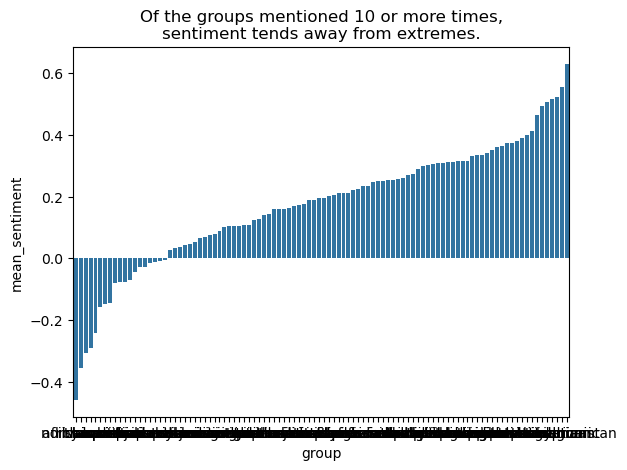

In [36]:
sns.barplot(x=group_stats_combined['group'], y = group_stats_combined['mean_sentiment'])
plt.title('Of the groups mentioned 10 or more times,\nsentiment tends away from extremes.')

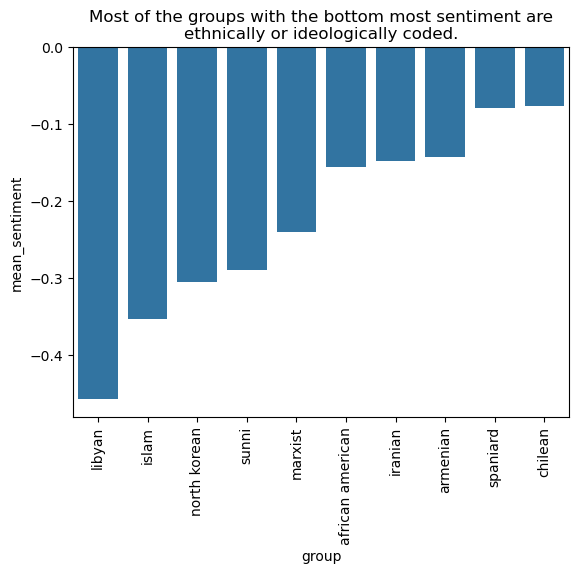

In [26]:
sns.barplot(x=group_stats_combined['group'][:10], y = group_stats_combined['mean_sentiment'][:10])
plt.title('Most of the groups with the bottom most sentiment are\nethnically or ideologically coded.')
plt.xticks(rotation=90);

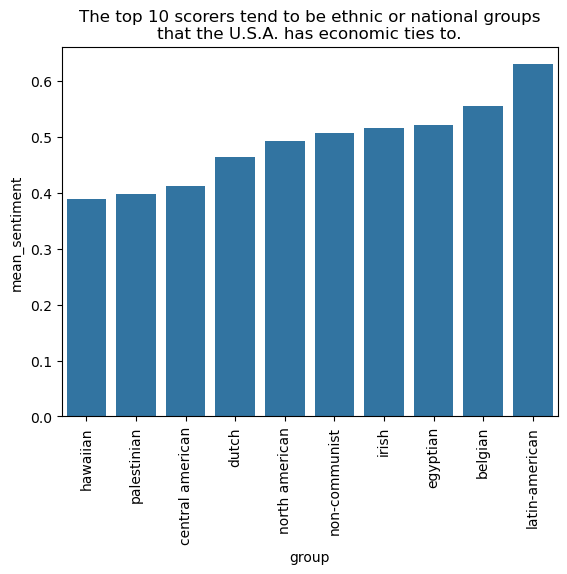

In [38]:
sns.barplot(x=group_stats_combined['group'][-10::], y = group_stats_combined['mean_sentiment'][-10::])
plt.title('The top 10 scorers tend to be ethnic or national groups\nthat the U.S.A. has economic ties to.')
plt.xticks(rotation=90);

Future directions: look at trends of muslim / iraqi mentions over time. Look as specifically american stuff (think about african americans too). Look at americans over time.

To Do:
- Target American(s) [any group that has american in it.]
- Sentiment of select groups over time

In [43]:
#Get a random sample of contexts and manually grade them
import random
random.seed(13)
validation = random.sample(range(len(sent_df)), 20)
validation

[8487,
 9527,
 6085,
 7554,
 4822,
 7378,
 6139,
 4266,
 2320,
 17410,
 7009,
 9655,
 982,
 14142,
 4138,
 19936,
 472,
 9038,
 4807,
 2783]

In [71]:
#Looking through for manual sentiment grading
print(sent_df.iloc[validation[19]]['group'])
print(sent_df.iloc[validation[19]])

American
group                                                      American
sentiment                                                    0.7845
context           I cannot.<br />\r\n<br />\r\nHere’s the truth:...
group_norm                                                 american
group_combined                                             american
Name: 2783, dtype: object


In [78]:
#Creating df
validation_df = pd.DataFrame({
    'validated_sent': [.5,.25,-.5,-1,.25,.25,-.25,.25,-.75,.25,-1,.25,.5,.75,-.25,.5,.25,0,.25,.75],
    'true_sent': [sent_df.iloc[validation[i]]['sentiment'] for i in range(len(validation))]
    },
    index = validation)
validation_df['diff'] = validation_df['true_sent'] - validation_df['validated_sent']

In [79]:
validation_df

,validated_sent,true_sent,diff
8487,0.50,0.1531,-0.3469
9527,0.25,0.2732,0.0232
6085,-0.50,0.2023,0.7023
7554,-1.00,-0.6249,0.3751
4822,0.25,0.7717,0.5217
7378,0.25,0.1779,-0.0721
6139,-0.25,0.9153,1.1653
4266,0.25,0.0000,-0.2500
2320,-0.75,-0.6310,0.1190
17410,0.25,0.9137,0.6637


In [83]:
print(f'The average difference between Vader sentiment and validated sentiment is {sum(validation_df['diff']) / 20}')
print(f'The average absolute difference between Vader sentiment and validated sentiment is {sum(abs(validation_df['diff'])) / 20}')

The average difference between Vader sentiment and validated sentiment is 0.18858
The average absolute difference between Vader sentiment and validated sentiment is 0.34389
